## Experiment

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [12]:
results_df=pd.read_csv('training_metrics.csv')
results_df

,step,train_cost,train_acc,test_cost,test_acc,n_train
0,1,1.8718,0.3773,1.1418,0.6500,1000
1,2,1.2384,0.5865,0.9470,0.6750,1000
2,3,1.0868,0.6510,0.9788,0.6550,1000
3,4,1.0463,0.6562,0.7593,0.7350,1000
4,5,0.9152,0.6900,0.7191,0.7500,1000
...,...,...,...,...,...,...
495,96,0.1040,0.9656,0.1018,0.9668,20000
496,97,0.1059,0.9642,0.1018,0.9663,20000
497,98,0.1054,0.9645,0.1021,0.9665,20000
498,99,0.1037,0.9644,0.1020,0.9665,20000


In [13]:
df_agg = results_df.groupby(["n_train", "step"]).agg(["mean", "std"]).reset_index()
df_agg

n_train step train_cost     train_acc     test_cost     test_acc    
                       mean std      mean std      mean std     mean std
0      1000    1     1.8718 NaN    0.3773 NaN    1.1418 NaN   0.6500 NaN
1      1000    2     1.2384 NaN    0.5865 NaN    0.9470 NaN   0.6750 NaN
2      1000    3     1.0868 NaN    0.6510 NaN    0.9788 NaN   0.6550 NaN
3      1000    4     1.0463 NaN    0.6562 NaN    0.7593 NaN   0.7350 NaN
4      1000    5     0.9152 NaN    0.6900 NaN    0.7191 NaN   0.7500 NaN
..      ...  ...        ...  ..       ...  ..       ...  ..      ...  ..
495   20000   96     0.1040 NaN    0.9656 NaN    0.1018 NaN   0.9668 NaN
496   20000   97     0.1059 NaN    0.9642 NaN    0.1018 NaN   0.9663 NaN
497   20000   98     0.1054 NaN    0.9645 NaN    0.1021 NaN   0.9665 NaN
498   20000   99     0.1037 NaN    0.9644 NaN    0.1020 NaN   0.9665 NaN
499   20000  100     0.1052 NaN    0.9658 NaN    0.1020 NaN   0.9663 NaN

[500 rows x 10 columns]

Generalization errors: [np.float64(0.05609999999999998), np.float64(0.02839999999999998), np.float64(0.009500000000000008), np.float64(-0.018600000000000005), np.float64(-0.0032000000000000084)]


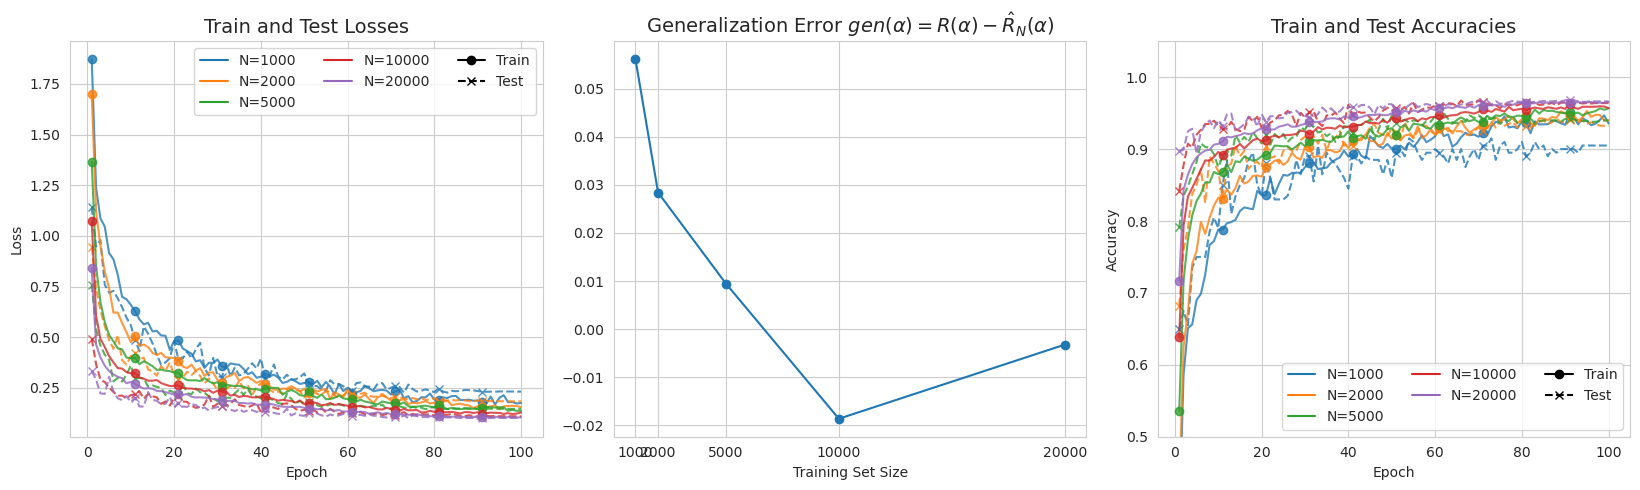

In [18]:
train_sizes=[1000,2000,5000,10000,20000]

# Plotting
sns.set_style('whitegrid')
colors = sns.color_palette()
fig, axes = plt.subplots(ncols=3, figsize=(16.5, 5))

generalization_errors = []

# Plot losses and accuracies
for i, n_train in enumerate(train_sizes):
    df = df_agg[df_agg.n_train == n_train]
    dfs = [df.train_cost["mean"], df.test_cost["mean"], df.train_acc["mean"], df.test_acc["mean"]]
    lines = ["o-", "x--", "o-", "x--"]
    labels = [fr"$N={n_train}$", None, fr"$N={n_train}$", None]
    axs = [0, 0, 2, 2]

    for k in range(4):
        ax = axes[axs[k]]
        ax.plot(df.step, dfs[k], lines[k], label=labels[k], markevery=10, color=colors[i], alpha=0.8)

    # Compute generalization error
    dif = df[df.step == 100].test_cost["mean"].values[0] - df[df.step == 100].train_cost["mean"].values[0]
    generalization_errors.append(dif)
print("Generalization errors:", generalization_errors)
# Format plots
axes[0].set_title('Train and Test Losses', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[1].plot(train_sizes, generalization_errors, "o-", label=r"$gen(\alpha)$")
axes[1].set_xticks(train_sizes)
axes[1].set_xticklabels(train_sizes)
axes[1].set_title(r'Generalization Error $gen(\alpha) = R(\alpha) - \hat{R}_N(\alpha)$', fontsize=14)
axes[1].set_xlabel('Training Set Size')

axes[2].set_title('Train and Test Accuracies', fontsize=14)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0.5, 1.05)

legend_elements = (
    [mpl.lines.Line2D([0], [0], label=f'N={n}', color=colors[i]) for i, n in enumerate(train_sizes)] +
    [
        mpl.lines.Line2D([0], [0], marker='o', ls='-', label='Train', color='Black'),
        mpl.lines.Line2D([0], [0], marker='x', ls='--', label='Test', color='Black')
    ]
)

axes[0].legend(handles=legend_elements, ncol=3)
axes[2].legend(handles=legend_elements, ncol=3)

plt.tight_layout()
plt.show()